In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
actions = {"d":(1,0),"r":(0,1)}

In [20]:
class Maze:
    def __init__(self):
        self.maze = np.zeros((3,3))
        self.robo_pos = (0,0)
        self.steps = 0
        self.allowed_states = None
        self.construct_allowedstates()
    def allowed_moves(self, current_pos, action):
        new_y = 0
        new_x = 0
        y, x = current_pos
        a, b = actions[action]
        new_y = y+a
        new_x = x+b
        if new_y < 0 or new_x < 0:
            return False
        elif new_y > 2 or new_x > 2:
            return False
        elif self.maze[new_y,new_x] == 2:
            return False
        return True
    def construct_allowedstates(self):
        self.allowed_states = {} 
        for y, row in enumerate(self.maze):
            for x, column in enumerate(row):
                if self.maze[y,x] != 2:
                    self.allowed_states[(y,x)] = []
                    for i in actions:
                        if self.allowed_moves((y,x), i):
                            self.allowed_states[(y,x)].append(i)
    def update_maze(self,action):
        y, x = self.robo_pos
        self.maze[y][x]=0
        a, b = actions[action]
        new_y = y+a
        new_x = x+b
        self.robo_pos = (new_y,new_x)
        self.maze[new_y][new_x] = 1
        self.steps+=1
    def game_over(self):
        if self.robo_pos == (2,2):
            return True
        else:
            return False
    def rewards(self):
        if self.robo_pos == (2,2):
            return 0
        else:
            return -1
    def get_StateReward(self):
        return self.robo_pos, self.rewards()
    

In [22]:
class agent:
    def __init__(self, states, alpha=0.10, randomFactor=0.25):
        self.state_history = [((0,0),0)]
        self.alpha=alpha
        self.randomFactor = randomFactor
        self.rewards = {}
        self.initial_rewards(states)
    def initial_rewards(self, states):
        for y, row in enumerate(states):
            for x, column in enumerate(row): 
                self.rewards[(y,x)] = np.random.uniform(low = 1.0, high = 0.1)
    def update_SH(self, state, reward):
        self.state_history.append((state,reward))
    def learning(self):
        target = 0
        a = self.alpha
        for state,reward in reversed(self.state_history):
            self.rewards[state] = self.rewards[state]+a*(target - self.rewards[state])
            target += reward
        self.state_history = []
        self.randomFactor -= 10e-5
    def choose_action(self, state, allowed_moves):
        max_reward = -10e15
        next_move = None
        n = np.random.random()
        if n < self.randomFactor:
            next_move = np.random.choice(allowed_moves)
        else:
            for action in allowed_moves:
                new_state = tuple([sum(x) for x in zip(state, actions[action])])
                if self.rewards[new_state]>=max_reward:
                    next_move = action
                    max_reward = self.rewards[new_state]
        return next_move

In [23]:
m1 = Maze()
print(m1.maze)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Episode 0

Episode 100

Episode 200

Episode 300

Episode 400

Episode 500

Episode 600

Episode 700

Episode 800

Episode 900

Episode 1000

Episode 1100

Episode 1200

Episode 1300

Episode 1400

Episode 1500

Episode 1600

Episode 1700

Episode 1800

Episode 1900

Episode 2000

Episode 2100

Episode 2200

Episode 2300

Episode 2400

Episode 2500

Episode 2600

Episode 2700

Episode 2800

Episode 2900

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

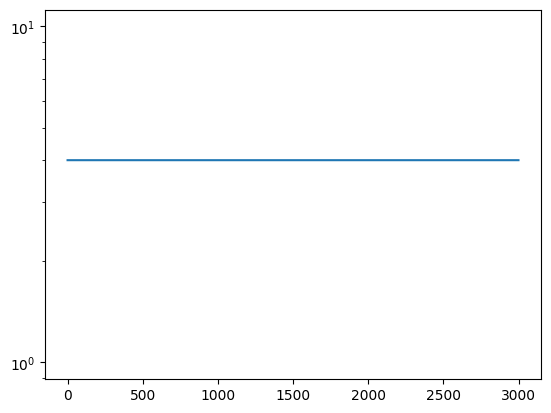

In [24]:
m1 = Maze()
robo = agent(m1.maze, alpha = 1, randomFactor = 0.10)
moveHistory = []

for i in range(3000):
    if i%100 == 0:
        print("Episode "+str(i))
        print("")
    while not m1.game_over():
        state = m1.get_StateReward()[0]
        #print("State ",state)
        action = robo.choose_action(state, m1.allowed_states[state])
        #print("Action ",action)
        m1.update_maze(action)
        #print(m1.maze)
        state, reward = m1.get_StateReward()
        #print("State: ",state," \nReward: ",reward)
        #print("")
        robo.update_SH(state, reward)
        #print(robo.state_history)
        if m1.steps > 1000:
            m1.robo_pos = (5,5)
    robo.learning()
    moveHistory.append(m1.steps)
    m1 = Maze()
    
print(moveHistory)
plt.semilogy(moveHistory)
plt.show()

In [17]:
print(moveHistory)

[1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 100